## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

Method: 

The spatial derivative is approximated with the one-sided difference
\begin{eqnarray}
U_{x}=\frac{U_{j}^n-U_{j-1}^n}{\Delta x} \qquad if \qquad U_{j}^n>0\\
U_{x}=\frac{U_{j+1}^n-U_{j}^n}{\Delta x} \qquad if \qquad U_{j}^n<0\\
\end{eqnarray}
It has the same stability requirement as the Lax-Friedrichs method: $\Delta t<\Delta x/U_{j}^n$ (CFL condition)
\begin{equation}
U_j^{n+1}=U_j^n-(U_{j}^n \Delta t) U_{x}
\end{equation}

t =  1.0999999999999999
t =  2.0000000000000004
t =  3.0000000000000013
t =  4.000000000000002
t =  5.099999999999998
t =  6.099999999999994
t =  7.099999999999991
t =  8.099999999999987
t =  9.099999999999984
t =  10.09999999999998
Done.


/var/folders/9y/650d6syj7198jyl1pprv_s2h0000gn/T/ipykernel_8894/2798653063.py:63: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


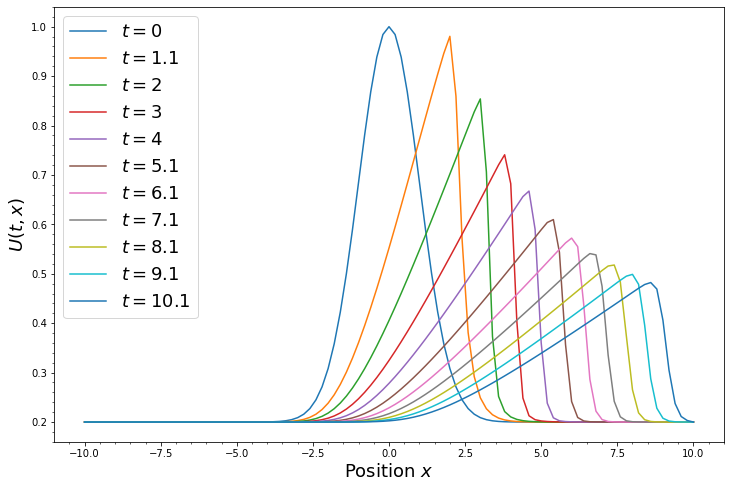

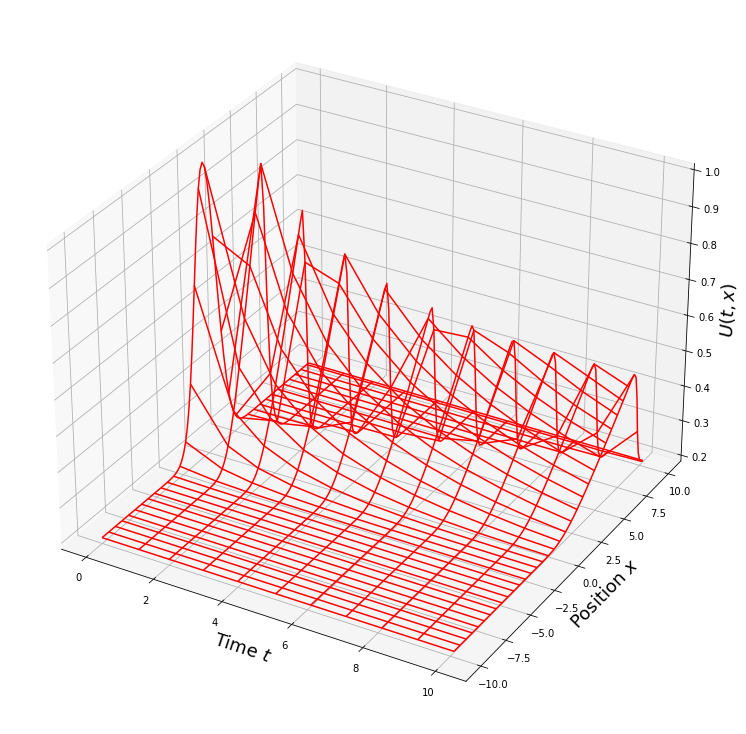

In [27]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.5 * dx
U = np.zeros(Nx,) 

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$", fontsize=18)
ax.set_ylabel(r"$U(t,x)$", fontsize=18)
ax.minorticks_on()

# Implement Upwind method 
tout = t+dtout 
while t < tend: 
    # previous timestep 
    Uold = np.copy(U)
       
    for ix in range(1, Nx-1): 
        if Uold[ix] > 0: 
            U[ix] = Uold[ix] - (Uold[ix])*dt*(Uold[ix] - Uold[ix-1])/dt
        else: 
            U[ix] = Uold[ix] - (Uold[ix+1])*dt*(Uold[ix+1] - Uold[ix])/dt
            
    t += dt
    
    # Output data after every dtout 
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend(fontsize=18)

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$", fontsize=18)
ax3D.set_ylabel("Position $x$", fontsize=18)
ax3D.set_zlabel(r"$U(t,x)$", fontsize=18)

print("Done.")
plt.show()

Discussion (part 3): 

The Burger's equation describes the dissapation of a fluid where the advection depends on the information being advected. The solution develops a non-symmetric profile over time. This may indicate the generation of a shock. 